Full Name: Trần Hoàng Bảo Ly

Student ID: 21521109

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit. 
Otherwise, check the code carefully.


import required  library

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Implement LinearRegression class


Gradient Descent


In [75]:
class LinearRegression_GD:
    def __init__(self, eta = 0.05, max_iter = 200, random_state = 21521109):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.b = 0
        self.costs = []
    def predict(self, X):
        return np.dot(X,self.w) + self.b
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size= X.shape[1])
        n = X.shape[0]
        self.costs = []
        for i in range(self.max_iter):
            y_pred = self.predict(X)
            diff = y-y_pred
            self.b += self.eta*(1.0/n)*np.sum(diff)
            self.w += self.eta*(1.0/n)*np.dot(X.T,diff)
            cost = np.sum(diff**2)/2
            self.costs.append(cost)
            

Normal Equation


In [76]:
class LinearRegression_NE:
    def __init__(self, random_state = 21521109):
        self.randomstate = random_state
        self.theta = None
    def fit(self, X, y):
        X_b = np.concatenate([np.ones((len(X),1)), X], axis=1)
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    def predict(self, X):
        if (X.ndim ==  1):
            X = np.reshape(X,[len(X),1])
        
        b_b = np.concatenate([np.ones((len(X),1)), X], axis=1)
        pred = b_b.dot(self.theta)
        return pred

Define remove outlier function

In [77]:
def RemoveOutlier(data : pd.DataFrame, propertys, low = 0.25, height = 0.75, iqrmul = 1.5) -> pd.DataFrame:
    for property in propertys:
        q_low = data[property].quantile(low)
        q_height = data[property].quantile(height)
        IQR = q_height -q_low
        low_fence = q_low - (iqrmul*IQR)
        height_fence = q_height + (1.5*IQR)
        data = data[(data[property] < height_fence) & (data[property] > low_fence)]
    return data

# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

Load and check data

In [78]:
# Code here
data =  pd.read_csv('./fish.csv')
data.head(10)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
5,450.0,26.8,29.7,34.7,13.6024,4.9274
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35.0,12.6700,4.6900
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,28.5,30.7,36.2,14.2266,4.9594


Fill na

In [79]:
meanVal = data.mean()
data.fillna(value=meanVal,inplace= True)

Remove outliers

<AxesSubplot: >

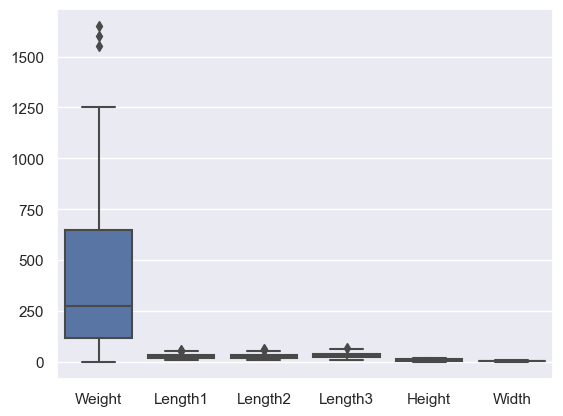

In [80]:
sns.boxplot(data)

<AxesSubplot: >

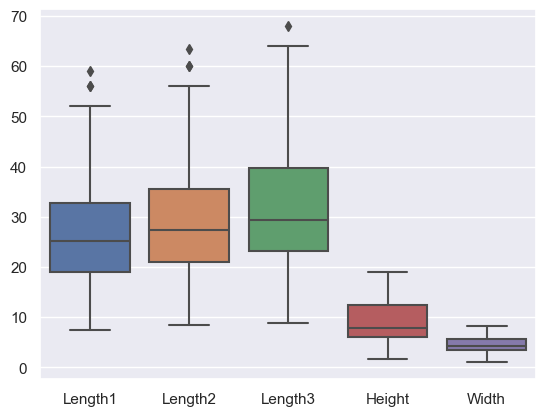

In [81]:
sns.boxplot(data.drop(['Weight'],axis=1))

Remove outliers

In [82]:
data = RemoveOutlier(data=data,propertys=data.columns)

<AxesSubplot: >

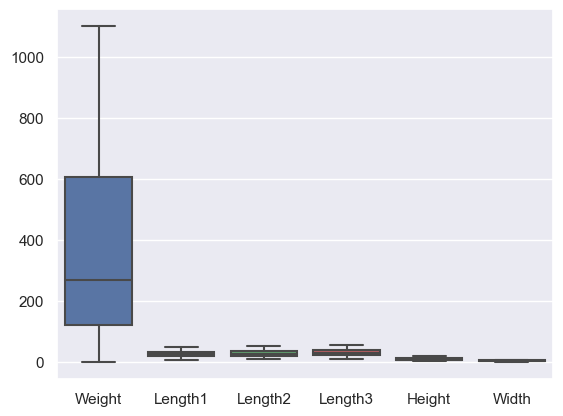

In [83]:
sns.boxplot(data)


<AxesSubplot: >

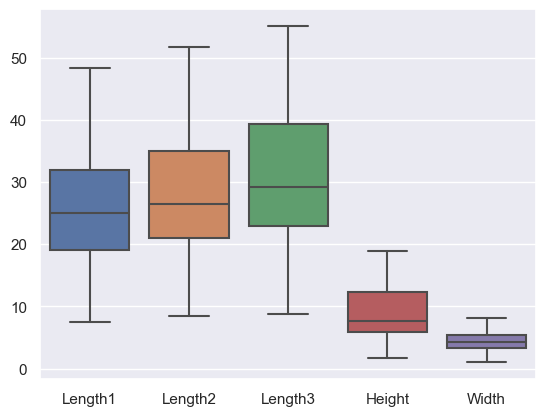

In [84]:
sns.boxplot(data.drop(['Weight'],axis=1))

Scale data to work with gradient descent

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

stdscaler = StandardScaler()
data[['Length1']]  = mmscaler.fit_transform(data[['Length1']])
data[['Length2']]  = mmscaler.fit_transform(data[['Length2']])
data[['Length3']]  = mmscaler.fit_transform(data[['Length3']])
data[['Height']]  = stdscaler.fit_transform(data[['Height']])
data[['Width']]  = stdscaler.fit_transform(data[['Width']])
data.head(10)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,0.384804,0.392610,0.457883,0.596952,-0.204281
1,290.0,0.404412,0.413395,0.483801,0.819069,-0.032121
2,340.0,0.401961,0.418014,0.481641,0.795422,0.203274
3,363.0,0.460784,0.475751,0.533477,0.876911,0.058239
4,430.0,0.465686,0.475751,0.544276,0.810739,0.467241
5,450.0,0.473039,0.491917,0.559395,1.078759,0.342702
6,500.0,0.473039,0.491917,0.555076,1.212283,0.554346
7,390.0,0.492647,0.498845,0.565875,0.863029,0.199597
8,450.0,0.492647,0.498845,0.568035,1.171886,0.292308
9,500.0,0.514706,0.515012,0.591793,1.223181,0.361992


In [86]:
from sklearn.model_selection import train_test_split
Y = data['Weight']
X = data.drop(['Weight'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=21521109)


We have 3 model:
-from sklearn
-normal equation implemented above
-gradient descentt implemented above

In [87]:
from sklearn.linear_model import LinearRegression
sk_normal_model = LinearRegression()
normal_model = LinearRegression_NE()
gd_model = LinearRegression_GD(0.2, max_iter=200)
sk_normal_model.fit(X_train,Y_train)
normal_model.fit(X_train, Y_train)
gd_model.fit(X_train, Y_train)

Text(0, 0.5, 'cost')

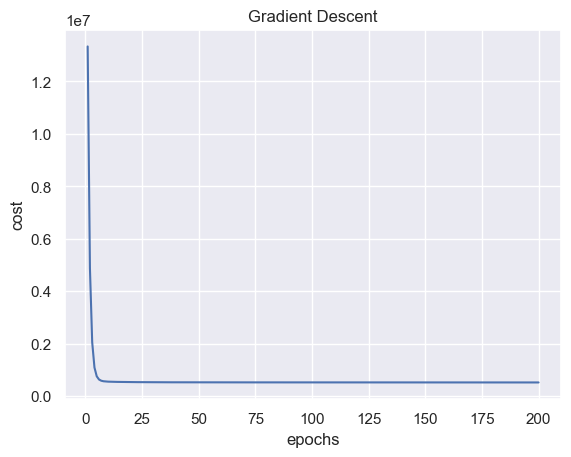

In [88]:
plt.plot(range(1,len(gd_model.costs)+1), gd_model.costs)
plt.title('Gradient Descent')
plt.xlabel('epochs')
plt.ylabel('cost')

Evaluate our three models

In [89]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as R2
from sklearn.metrics import r2_score as R2 

sk_y_pred_train = sk_normal_model.predict(X_train) 
sk_y_pred_test = sk_normal_model.predict(X_test) 
normal_y_pred_train = normal_model.predict(X_train) 
normal_y_pred_test = normal_model.predict(X_test) 
gd_y_pred_train = gd_model.predict(X_train) 
gd_y_pred_test = gd_model.predict(X_test) 

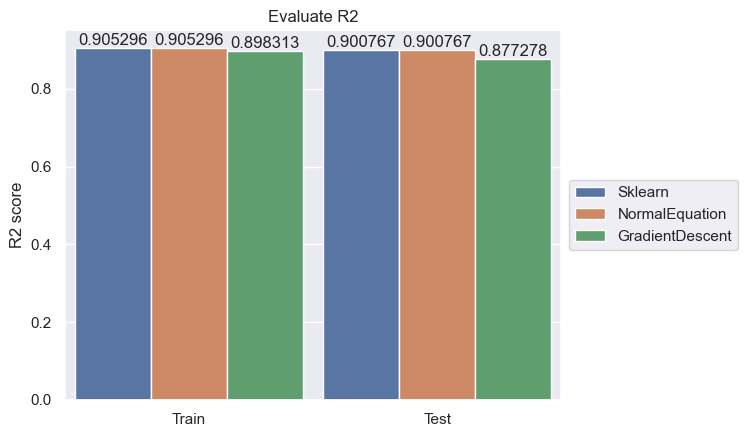

In [90]:
listdataR2 = [['Train','Sklearn',round(R2(Y_train, sk_y_pred_train),6)]]
listdataR2.append(['Train','NormalEquation',round(R2(Y_train, normal_y_pred_train),6)])
listdataR2.append(['Train','GradientDescent',round(R2(Y_train, gd_y_pred_train),6)])
listdataR2.append(['Test','Sklearn',round(R2(Y_test, sk_y_pred_test),6)])
listdataR2.append(['Test','NormalEquation',round(R2(Y_test, normal_y_pred_test),6)])
listdataR2.append(['Test','GradientDescent',round(R2(Y_test, gd_y_pred_test),6)])
R2pd = pd.DataFrame(listdataR2, columns=['Type','Name', 'Values'])
R2pd.head(6)

ax = sns.barplot(data = R2pd, x = 'Type', y = 'Values', hue = 'Name', errwidth=0, width= 0.92)
plt.title('Evaluate R2')
plt.xlabel('')
plt.ylabel('R2 score')
plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in ax.containers:
    ax.bar_label(i,)

# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [91]:
# Code here
data = pd.read_csv('./insurance.csv')
data.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [92]:
from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
data['region'] = lEncoder.fit_transform(data['region'])
data['sex'] = lEncoder.fit_transform(data['sex'])
data['smoker'] = lEncoder.fit_transform(data['smoker'])
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


Fill na

In [93]:
meanVal = data.mean()
data.fillna(value=meanVal,inplace= True)

<AxesSubplot: >

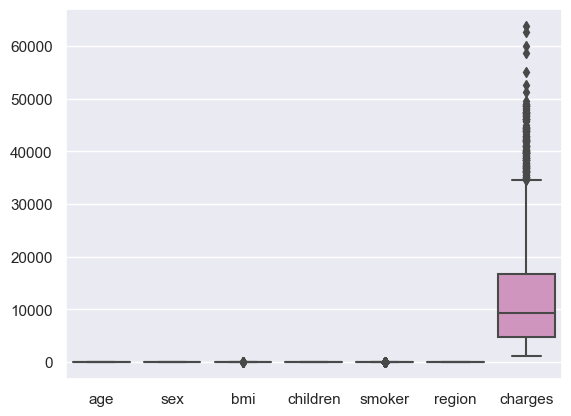

In [94]:
sns.boxplot(data)

<AxesSubplot: >

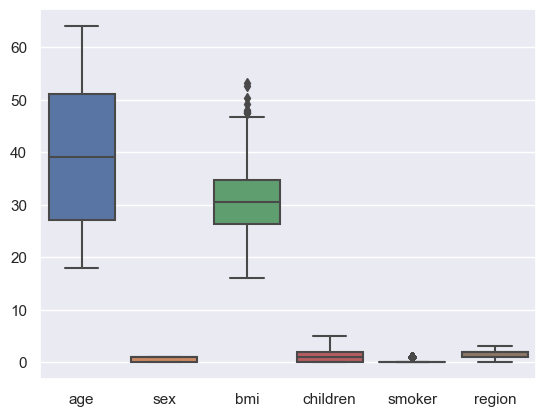

In [95]:
sns.boxplot(data.drop(['charges'], axis=1))


In [96]:
data = RemoveOutlier(data, ['charges'],0.15,0.85)
data = RemoveOutlier(data, ['bmi'], 0.15, 0.85)

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

stdscaler = StandardScaler()
data[['age']]  = mmscaler.fit_transform(data[['age']])
data[['bmi']]  = mmscaler.fit_transform(data[['bmi']])
data[['sex']]  = stdscaler.fit_transform(data[['sex']])
data[['children']]  = stdscaler.fit_transform(data[['children']])
data[['region']]  = stdscaler.fit_transform(data[['region']])

data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,0.021739,-1.01055,0.321227,-0.908903,1,1.342422,16884.92400
1,0.000000,0.98956,0.479150,-0.079008,0,0.437525,1725.55230
2,0.217391,0.98956,0.458434,1.580782,0,0.437525,4449.46200
3,0.326087,0.98956,0.181464,-0.908903,0,-0.467372,21984.47061
4,0.304348,0.98956,0.347592,-0.908903,0,-0.467372,3866.85520
5,0.282609,-1.01055,0.263115,-0.908903,0,0.437525,3756.62160
6,0.608696,-1.01055,0.470272,-0.079008,0,0.437525,8240.58960
7,0.413043,-1.01055,0.316922,1.580782,0,-0.467372,7281.50560
8,0.413043,0.98956,0.373150,0.750887,0,-1.372269,6406.41070
9,0.913043,-1.01055,0.265806,-0.908903,0,-0.467372,28923.13692


In [98]:
from sklearn.model_selection import train_test_split
Y = data['charges']
X = data.drop(['charges'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=21521109)

In [99]:
from sklearn.linear_model import LinearRegression
sk_normal_model = LinearRegression()
normal_model = LinearRegression_NE()
gd_model = LinearRegression_GD(0.5, max_iter=200)
sk_normal_model.fit(X_train,Y_train)
normal_model.fit(X_train, Y_train)
gd_model.fit(X_train, Y_train)

Text(0, 0.5, 'cost')

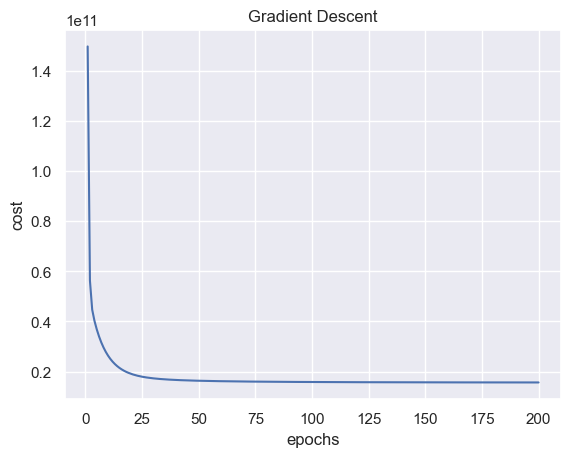

In [100]:
plt.plot(range(1,len(gd_model.costs)+1), gd_model.costs)
plt.title('Gradient Descent')
plt.xlabel('epochs')
plt.ylabel('cost')

In [101]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as R2
from sklearn.metrics import r2_score as R2 

sk_y_pred_train = sk_normal_model.predict(X_train) 
sk_y_pred_test = sk_normal_model.predict(X_test) 
normal_y_pred_train = normal_model.predict(X_train) 
normal_y_pred_test = normal_model.predict(X_test) 
gd_y_pred_train = gd_model.predict(X_train) 
gd_y_pred_test = gd_model.predict(X_test) 

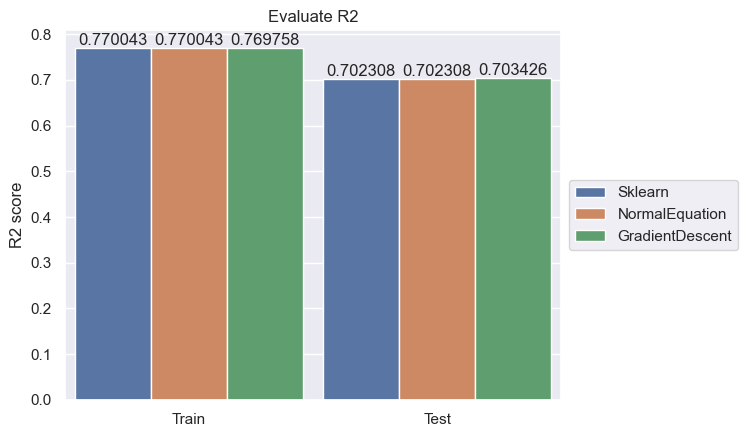

In [102]:
listdataR2 = [['Train','Sklearn',round(R2(Y_train, sk_y_pred_train),6)]]
listdataR2.append(['Train','NormalEquation',round(R2(Y_train, normal_y_pred_train),6)])
listdataR2.append(['Train','GradientDescent',round(R2(Y_train, gd_y_pred_train),6)])
listdataR2.append(['Test','Sklearn',round(R2(Y_test, sk_y_pred_test),6)])
listdataR2.append(['Test','NormalEquation',round(R2(Y_test, normal_y_pred_test),6)])
listdataR2.append(['Test','GradientDescent',round(R2(Y_test, gd_y_pred_test),6)])
R2pd = pd.DataFrame(listdataR2, columns=['Type','Name', 'Values'])
R2pd.head(6)

ax = sns.barplot(data = R2pd, x = 'Type', y = 'Values', hue = 'Name', errwidth=0, width= 0.92)
plt.title('Evaluate R2')
plt.xlabel('')
plt.ylabel('R2 score')
plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in ax.containers:
    ax.bar_label(i,)

# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [103]:
# Code here
data = pd.read_csv('./tesla_stock.csv')
data.head(10)


,Open,High,Low,Close,Volume
0,19.000000,25.000000,17.540001,23.889999,18766300
1,25.790001,30.420000,23.299999,23.830000,17187100
2,25.000000,25.920000,20.270000,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,6866900
5,16.400000,16.629999,14.980000,15.800000,6921700
6,16.139999,17.520000,15.570000,17.459999,7711400
7,17.580000,17.900000,16.549999,17.400000,4050600
8,17.950001,18.070000,17.000000,17.049999,2202500
9,17.389999,18.639999,16.900000,18.139999,2680100


In [104]:
maxClose = data['Close'].max()
print(maxClose)

780.0


<AxesSubplot: >

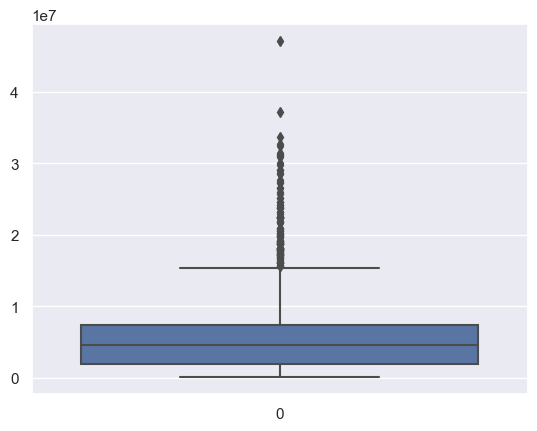

In [105]:
sns.boxplot(data['Volume'])

In [106]:
data = RemoveOutlier(data,['Volume'],height=0.85)

<AxesSubplot: >

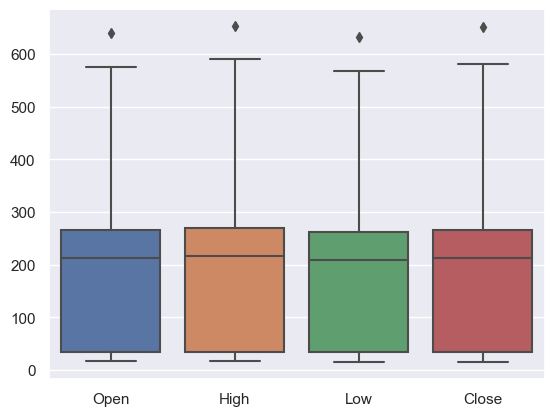

In [107]:
sns.boxplot(data.drop(['Volume'],axis = 1))

In [108]:
data = RemoveOutlier(data,data.drop(['Volume'],axis = 1).columns,height=0.75)

<AxesSubplot: >

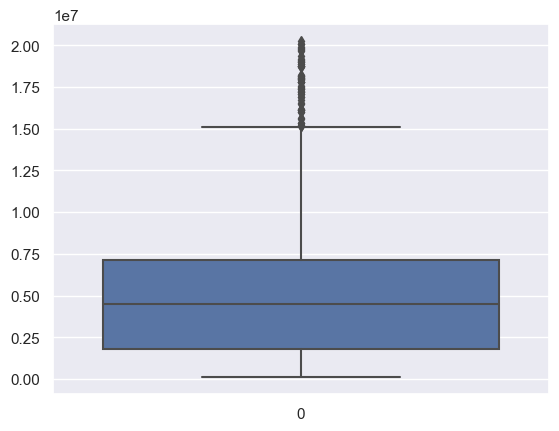

In [109]:
sns.boxplot(data['Volume'])

<AxesSubplot: >

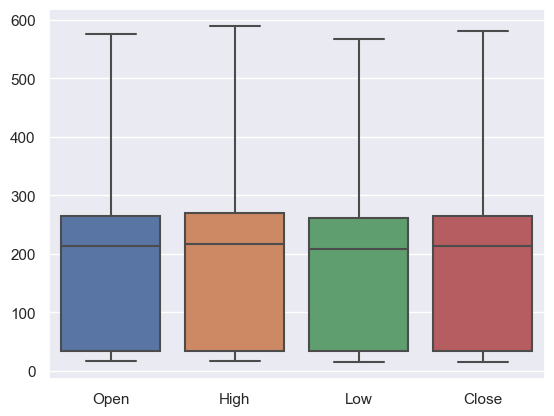

In [110]:
sns.boxplot(data.drop(['Volume'],axis = 1))

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

stdscaler = StandardScaler()
data[['Volume']]  = mmscaler.fit_transform(data[['Volume']])
data[['Open']]  = stdscaler.fit_transform(data[['Open']])
data[['High']]  = stdscaler.fit_transform(data[['High']])
data[['Low']]  = stdscaler.fit_transform(data[['Low']])

data.head(10)

,Open,High,Low,Close,Volume
0,-1.412120,-1.366482,-1.419309,23.889999,0.926659
1,-1.354147,-1.320905,-1.369338,23.830000,0.848184
2,-1.360892,-1.358746,-1.395625,21.959999,0.402525
3,-1.377968,-1.382459,-1.409159,19.200001,0.249522
4,-1.403582,-1.408527,-1.434144,16.110001,0.335346
5,-1.434319,-1.436865,-1.441518,15.800000,0.338069
6,-1.436539,-1.429381,-1.436400,17.459999,0.377311
7,-1.424244,-1.426186,-1.427898,17.400000,0.195396
8,-1.421085,-1.424756,-1.423994,17.049999,0.103559
9,-1.425867,-1.419963,-1.424861,18.139999,0.127293


In [112]:
from sklearn.model_selection import train_test_split
Y = data['Close']
X = data.drop(['Close'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=21521109)

In [113]:
from sklearn.linear_model import LinearRegression
sk_normal_model = LinearRegression()
normal_model = LinearRegression_NE()
gd_model = LinearRegression_GD(0.5, max_iter=200)
sk_normal_model.fit(X_train,Y_train)
normal_model.fit(X_train, Y_train)
gd_model.fit(X_train, Y_train)

Text(0, 0.5, 'cost')

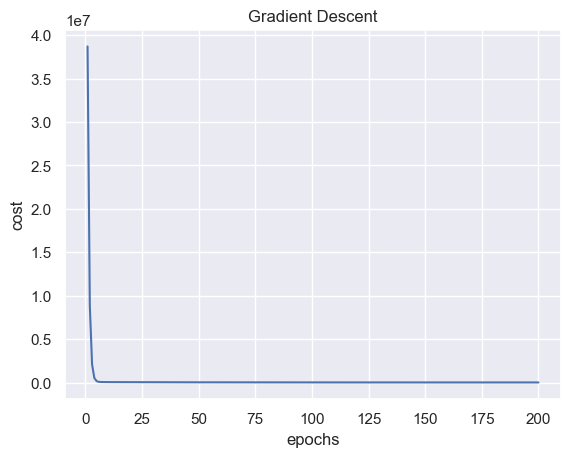

In [114]:
plt.plot(range(1,len(gd_model.costs)+1), gd_model.costs)
plt.title('Gradient Descent')
plt.xlabel('epochs')
plt.ylabel('cost')

In [119]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as R2
from sklearn.metrics import r2_score as R2 

sk_y_pred_train = sk_normal_model.predict(X_train) 
sk_y_pred_test = sk_normal_model.predict(X_test) 
normal_y_pred_train = normal_model.predict(X_train) 
normal_y_pred_test = normal_model.predict(X_test) 
gd_y_pred_train = gd_model.predict(X_train) 
gd_y_pred_test = gd_model.predict(X_test) 


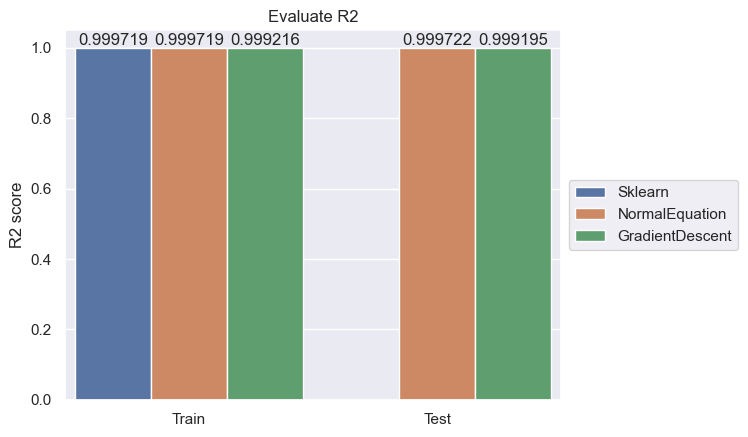

In [120]:
listdataR2 = [['Train','Sklearn',round(R2(Y_train, sk_y_pred_train),6)]]
listdataR2.append(['Train','NormalEquation',round(R2(Y_train, normal_y_pred_train),6)])
listdataR2.append(['Train','GradientDescent',round(R2(Y_train, gd_y_pred_train),6)])
listdataR2.append(['Test','NormalEquation',round(R2(Y_test, normal_y_pred_test),6)])
listdataR2.append(['Test','GradientDescent',round(R2(Y_test, gd_y_pred_test),6)])
R2pd = pd.DataFrame(listdataR2, columns=['Type','Name', 'Values'])
R2pd.head(6)

ax = sns.barplot(data = R2pd, x = 'Type', y = 'Values', hue = 'Name', errwidth=0, width= 0.92)
plt.title('Evaluate R2')
plt.xlabel('')
plt.ylabel('R2 score')
plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in ax.containers:
    ax.bar_label(i,)

In [121]:
import random
import numpy as np
lista = [0,0,0]
for i in range(10000):
    k = random.randint(0,2)
    lista[k] += 1
lista = np.column_stack((range(1,4), lista))
import pandas as pd
lista = pd.DataFrame(lista, columns=['Name', 'Times'])
import seaborn as sns


<AxesSubplot: xlabel='Name', ylabel='Times'>

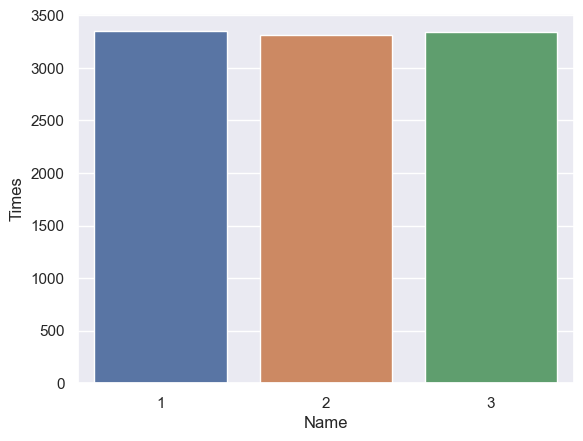

In [122]:
sns.barplot(data=lista, x = lista['Name'], y=lista['Times'])